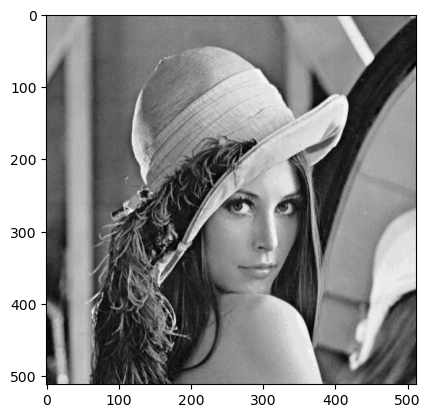

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import math

#Reading the image
image=cv2.imread("lenac.jpg");
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_image,cmap="gray")

array([[61, 58, 66, ..., 71, 47, 30],
       [61, 59, 66, ..., 72, 48, 29],
       [60, 59, 66, ..., 76, 49, 26],
       ...,
       [ 0,  1,  1, ..., 14, 14, 12],
       [ 0,  1,  1, ..., 15, 16, 15],
       [ 1,  0,  2, ..., 15, 17, 16]], dtype=uint8)

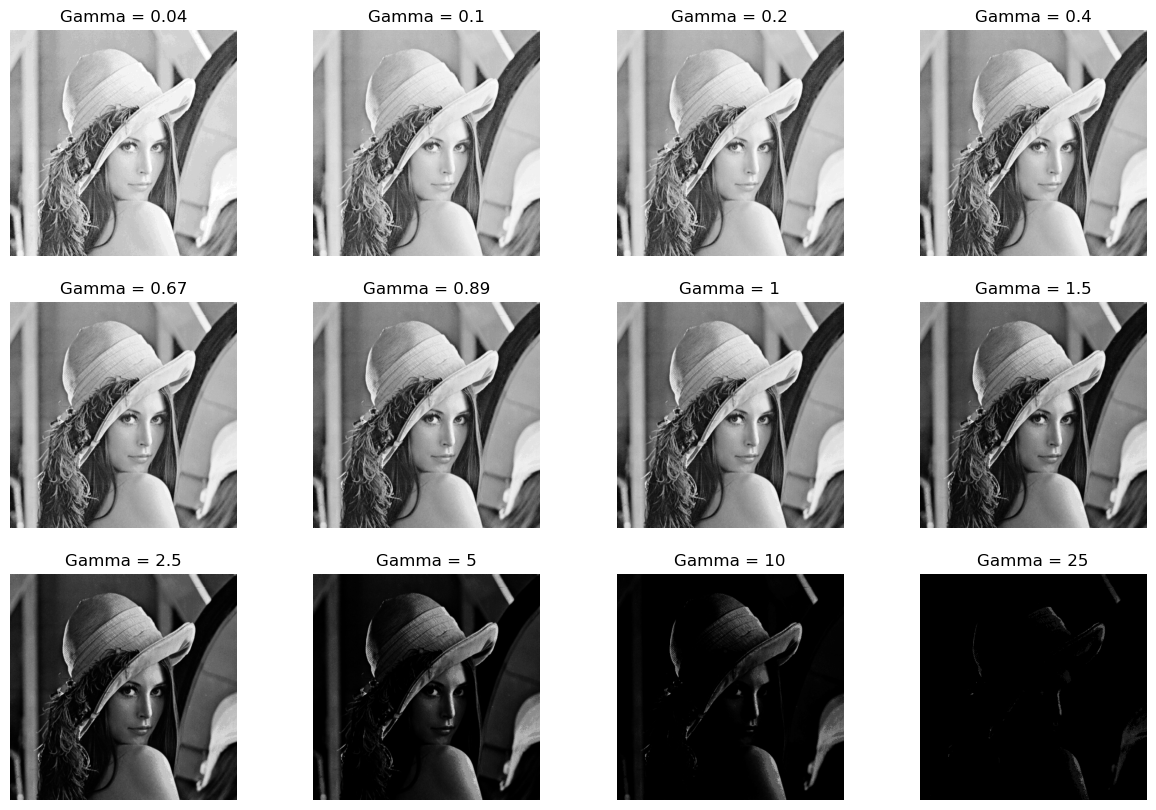

In [23]:

# new_gray_image = gray_image.astype(np.float32)
def power_law_transform(image,glevel,gamma):
    if(gamma==1):
        return image
    else:
        row=image.shape[0]
        col=image.shape[1]
        transformed_image=np.zeros((row,col))
        normalized_image = image/(glevel-1)
        for i in range(0,row):
            for j in range(0,col):
                transformed_image[i][j]=((normalized_image[i][j])**gamma)  
        transformed_image=transformed_image*(glevel-1)        
        
#         transformed_image = np.clip(transformed_image, 0,255)
        transformed_image=transformed_image.astype(np.uint8)        
        return transformed_image;
#         return transformed_image
    
gamma_values=[0.04,0.10,0.20,0.40,0.67,0.89,1,1.5,2.5,5,10,25]

# Creating the subplot
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.set_title(f"Gamma = {gamma_values[i]}")
    transformed_image = power_law_transform(gray_image,256, gamma_values[i])
    ax.imshow(transformed_image, cmap="gray")
    ax.axis('off')

# plt.tight_layout()
# plt.show()
power_law_transform(gray_image,256,3)



In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the input image
image = cv2.imread('lenac.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Read the secret message (random binary message for demonstration)
secret_message = np.random.randint(0, 2, size=image.shape[0]*image.shape[1])

# Step 3: Embed the message in the LSB of the image pixel values
embedded_image = np.copy(image)
flat_image = embedded_image.flatten()
flat_image[0:len(secret_message)] &= 254  # Clear the LSBs
flat_image[0:len(secret_message)] |= secret_message  # Embed the message

# Reshape the flat image back to the original shape
embedded_image = flat_image.reshape(image.shape)

# Save the embedded image and display it
cv2.imwrite('embedded_image.jpg', embedded_image)
plt.imshow(embedded_image, cmap='gray')
plt.axis('off')
plt.title('Embedded Image')
plt.show()

# Step 5: Extract the message from the embedded image
extracted_message = (flat_image[0:len(secret_message)] & 1).astype(np.uint8)

# Step 6: Plot histograms of the input image, embedded image, and the image obtained after message extraction
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Input Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(embedded_image.flatten(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title('Embedded Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(extracted_message, bins=2, range=(0, 1), color='red', alpha=0.7)
plt.title('Extracted Message Histogram')
plt.xlabel('Bit Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


TypeError: ufunc 'bitwise_or' output (typecode 'i') could not be coerced to provided output parameter (typecode 'B') according to the casting rule ''same_kind''

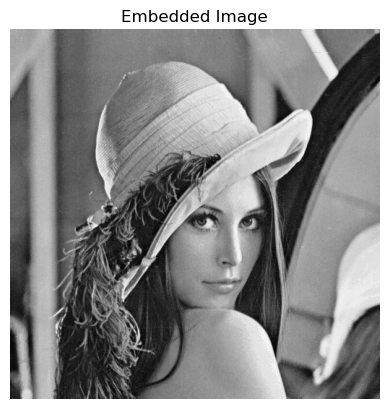

Extracted Message: Good Morning


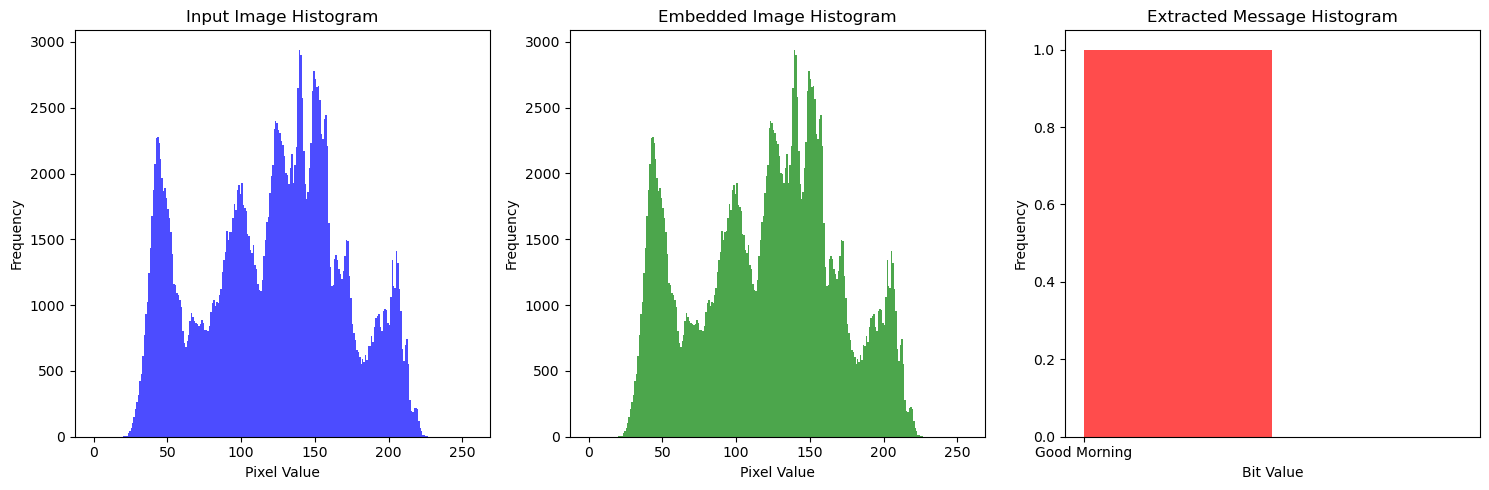

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the input image
image = cv2.imread('lenac.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Convert the message to binary
message = "Good Morning"
binary_message = ''.join(format(ord(char), '08b') for char in message)

# Step 3: Embed the binary message in the LSB of the image pixel values
embedded_image = np.copy(image)
flat_image = embedded_image.flatten()
flat_message = [int(bit) for bit in binary_message]
flat_image[0:len(flat_message)] &= 254  # Clear the LSBs
flat_image[0:len(flat_message)] |= np.array(flat_message, dtype=np.uint8)  # Embed the message

# Reshape the flat image back to the original shape
embedded_image = flat_image.reshape(image.shape)

# Reshape the flat image back to the original shape
embedded_image = flat_image.reshape(image.shape)

# Save the embedded image and display it
cv2.imwrite('embedded_image.jpg', embedded_image)
plt.imshow(embedded_image, cmap='gray')
plt.axis('off')
plt.title('Embedded Image')
plt.show()

# Step 5: Extract the binary message from the embedded image
extracted_message = ''.join([str(pixel & 1) for pixel in flat_image[0:len(flat_message)]])

# Step 6: Convert the binary message back to text
extracted_message = ''.join(chr(int(extracted_message[i:i+8], 2)) for i in range(0, len(extracted_message), 8))

print("Extracted Message:", extracted_message)

# Step 7: Plot histograms of the input image, embedded image, and the image obtained after message extraction
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Input Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(embedded_image.flatten(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title('Embedded Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(extracted_message, bins=2, range=(0, 1), color='red', alpha=0.7)
plt.title('Extracted Message Histogram')
plt.xlabel('Bit Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
